In [ ]:
import pandas as pd

df = pd.read_csv('/content/sample_data/spamData.csv', encoding='latin-1')

df.info()

df.drop(df.columns[4], axis=1, inplace=True)
df.drop(df.columns[3], axis=1, inplace=True)
df.drop(df.columns[2], axis=1, inplace=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   target      5572 non-null   object
 1   rawText     5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   5572 non-null   object
 1   rawText  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.head()

,target,rawText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
import numpy as np

np.unique(df.target)

array(['ham', 'spam'], dtype=object)

In [ ]:
x = list(df['rawText'])
y = list(df['target'])



In [ ]:
class tokenizer:
    def __init__(self, text_data):
        self.vocab = {}
        self.__get_vocab(text_data)
        
    def convert_text_dataset_to_matrix(self, X):
        vocab = self.vocab
        result = []       
        for text in tqdm(X):
            vector = self.__text_to_vector(text)
            result.append(vector)
        return result
    
    def __get_vocab(self, text_data):
        word_id = 0
        for text in text_data:
            words = text.split()
            for word in words:
                word = word.lower()
                if word not in self.vocab:
                    self.vocab[word] = word_id
                    word_id += 1
        print(f'Dictionary size : {len(self.vocab)}')
    
    def __text_to_vector(self, text):
        vocab = self.vocab
        result = list(np.zeros(len(vocab)))
        words = text.split()
        for word in words:
            word = word.lower()
            if word in vocab:
                result[vocab[word]] += 1
        return result

In [ ]:
from tqdm import tqdm

tz = tokenizer(x)

Dictionary size : 13496


In [ ]:
X = tz.convert_text_dataset_to_matrix(x)

100%|██████████| 5572/5572 [00:06<00:00, 848.81it/s]


In [ ]:
n = len(X)
p = len(X[0])

print('Number of data in X is ', n, ' (n)')
print('Dimension of feature vector (dictionary size) is ', p, ' (p)')

Number of data in X is  5572  (n)
Dimension of feature vector (dictionary size) is  13496  (p)


# KNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report



knn = KNeighborsClassifier(n_neighbors=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)



knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
print("Training accuracy = ", sum(y_train_pred == y_train) / len(y_train_pred))

y_test_pred = knn.predict(X_test)
print("Test accuracy = ", sum(y_test_pred == y_test) / len(y_test_pred))

conf_mtrx_knn=confusion_matrix(y_test, y_test_pred)
print(conf_mtrx_knn)
print()

print('Classification Report')
print(classification_report(y_test, y_test_pred))

Training accuracy =  1.0
Test accuracy =  0.9533492822966507
[[1455    2]
 [  76  139]]

Classification Report
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1457
        spam       0.99      0.65      0.78       215

    accuracy                           0.95      1672
   macro avg       0.97      0.82      0.88      1672
weighted avg       0.95      0.95      0.95      1672



In [ ]:
from matplotlib import pyplot as plt

def plot_confusion_matrix(conf_mtrx, classes, cmap=plt.cm.Blues):
    num_class = conf_mtrx.shape[0]
    
    fig, ax = plt.subplots()
    im = ax.imshow(conf_mtrx, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(num_class), yticks=np.arange(num_class),
           xticklabels=classes, yticklabels=classes, 
           ylabel='True label', xlabel='Predicted label')

    middle_threshold = conf_mtrx.max() / 2.
    for row in range(num_class):
        for col in range(num_class):
            ax.text(col, row, format(conf_mtrx[row, col], '.0f'), ha="center", va="center",
                    color="white" if conf_mtrx[row, col] > middle_threshold else "black")
    fig.tight_layout()
    plt.show()

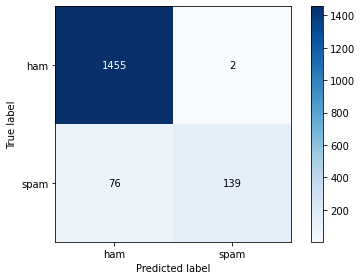

In [ ]:
plot_confusion_matrix(conf_mtrx_knn, np.unique(df.target), cmap=plt.cm.Blues)

# Naive Bayes classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123) 

print(f'Training set size is {len(X_train)} rows')
print(f'Test set size is {len(X_test)} rows')
print(f'Train + test set size is {len(X_train) + len(X_test)} rows')


nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

Training set size is 3900 rows
Test set size is 1672 rows
Train + test set size is 5572 rows


In [ ]:
y_pred

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [ ]:


print('Train Accuracy: ', accuracy_score(y_train, nb.predict(X_train)))
print()
print('Test Accuracy: ', accuracy_score(y_test, y_pred))
print()

conf_mtrx = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(conf_mtrx)
print()

print('Classification Report')
print(classification_report(y_test, y_pred))

Train Accuracy:  0.9876923076923076

Test Accuracy:  0.9324162679425837

Confusion Matrix
[[1367   90]
 [  23  192]]

Classification Report
              precision    recall  f1-score   support

         ham       0.98      0.94      0.96      1457
        spam       0.68      0.89      0.77       215

    accuracy                           0.93      1672
   macro avg       0.83      0.92      0.87      1672
weighted avg       0.94      0.93      0.94      1672



Plot Confusion Matrix

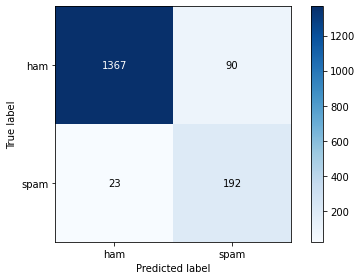

In [ ]:
plot_confusion_matrix(conf_mtrx, np.unique(df.target), cmap=plt.cm.Blues)

# SVM Classifier

In [ ]:
from sklearn import svm, datasets
from sklearn.svm import SVC




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)
classifier = SVC(kernel='linear', probability=True, random_state=0)


classifier.fit(X_train, y_train)

y_train_pred = classifier.predict(X_train)
print("Training accuracy = ", sum(y_train_pred == y_train) / len(y_train_pred))

y_test_pred = classifier.predict(X_test)
print("Test accuracy = ", sum(y_test_pred == y_test) / len(y_test_pred))

conf_mtrx_svm=confusion_matrix(y_test, y_test_pred)
print()

print(conf_mtrx_svm)
print()

print('Classification Report')
print(classification_report(y_test, y_test_pred))


Training accuracy =  1.0
Test accuracy =  0.9826555023923444

[[1454    3]
 [  26  189]]

Classification Report
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1457
        spam       0.98      0.88      0.93       215

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



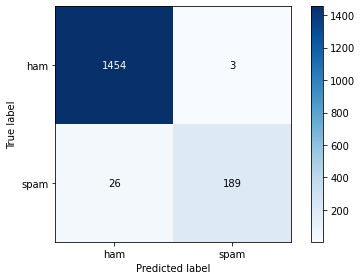

In [ ]:
plot_confusion_matrix(conf_mtrx_svm, np.unique(df.target), cmap=plt.cm.Blues)

**ROC**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score


r_probs =[0 for _ in range(len(y_test))]

knn_probs=knn.predict_proba(X_test)
nb_probs=nb.predict_proba(X_test)
svm_probs=classifier.predict_proba(X_test)

nb_probs=nb_probs[:,1]
svm_probs=svm_probs[:,1]
knn_probs=knn_probs[:,1]

In [ ]:
r_auc=roc_auc_score(y_test,r_probs)

nb_auc=roc_auc_score(y_test,nb_probs)
svm_auc=roc_auc_score(y_test,svm_probs)
knn_auc=roc_auc_score(y_test,knn_probs)

In [ ]:
from sklearn.preprocessing import label_binarize

y_test = label_binarize(y_test,classes=['ham','spam'])

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

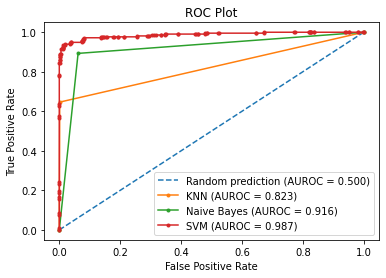

In [ ]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN (AUROC = %0.3f)' % knn_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (AUROC = %0.3f)' % svm_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

**CONCLUSION**

**The number of misclassified samples (FP+FN)**

**KNN         :  76+2=78**

**Naive Bayes :  23+90=113**

**SVM         :  26+3=29**

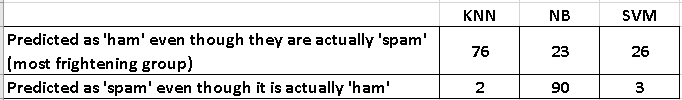


Note that since k = 1 for knn, the object belongs to the class of its nearest neighbor.

What matters to us in the confusion matrixes is the high number of correctly classified data (TP+TN). 

KNN : 1455+139= 1594

NB  : 1367+192= 1559

SVM : 1454+189= 1643 


**It is observed from the classification reports that accuracy alone does not mean anything. In this problem, precision and recall metrics are as important as accuracy.**

Emails that are predicted 'ham' even though they are actually 'spam' can pose a great danger to my system. In other words, it is important for me that the number of these data classified as FP is small. Therefore, the higher the precision, the lower the number.

**There may be some mails that are actually 'ham' but are predicted 'spam', which are very important to me and that I need to see. In other words, it is important for me that the number of these data classified as FN is small. Therefore, the higher the recall, the lower the number.**

Therefore, I would not prefer knn classifications with low recall metrics and nb classifications with low precision metrics. Along with these metrics, I prefer the svm classification whose the accuracy metric is high.

**The roc curve we have already drawn shows this. The area under the curve of the Svm classification is the largest. After that, the area under the curve of the NB classification is large. The smallest area belongs to the knn classification.**

Also,the fact that the number of data classified as TP (y-axis) is high and the number of data classified as FP (x-axis) is low is what we want to see in the ROC curve.

